# <u>Chapter 2</u> - Spam Detection

A `spam detector` of a company’s email server does tens, hundreds, or even thousands of checks per day to decide whether an incoming email is spam or not. Without its assistance, irrelevant and possibly dangerous correspondence can flood our inbox. In this exercise, we implement a spam detector from scratch and present various techniques related to natural language processing and text mining:

* **Exploratory data analysis**
    * Word clouds
* **Text preprocessing**
    * Tokenization
    * Stop words removal
    * Stemming
    * Lemmatization
    * Regular expressions
* **Text representations**
    * Label encoding
    * One-hot encoding
    * Token count encoding
    * Tf-idf encoding
* **Classification**
    * Supervised learning
    * Creating train and test sets
    * Feature engineering
    * Overfit vs. Underfit
* **Classification algorithms**
    * Support Vector Machines
    * Naïve Bayes
* **Performance**
    * Accuracy
    * Precision
    * Recall
    * F-score
    * ROC and AUC

We will be using a subset of the annotated email corpus found here: <https://spamassassin.apache.org/old/publiccorpus/>

For Windows users download and install "Microsoft C++ Build Tools" from: https://visualstudio.microsoft.com/visual-cpp-build-tools/

In [ ]:
# Install the necessary modules.
%pip install matplotlib
%pip install wordcloud
%pip install sklearn
%pip install nltk

## Word clouds

One possible idea is to examine the corpus and check whether certain words appear more often in each category. Intuitively, those words can serve as a way to separate the two types of emails. An easy way to perform this task is to visualize the body of the message using a technique called `word clouds` (also known as tag clouds). Each word appears with different font sizes according to their frequency in the dataset (recurring words appear larger than infrequent ones). One possible implementation of word clouds in Python is the module `word_cloud`. 

The image suggests that the most common word in our spam message is *“virus”*.

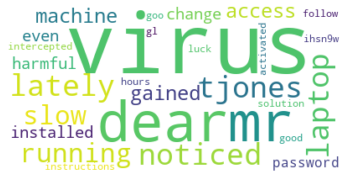

In [43]:
%matplotlib inline
# Import the necessary modules.
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the text from the file spam.txt.
text = open('./data/spam.txt').read()

# Create and configure the word cloud object.
wc = WordCloud(background_color="white", max_words=2000)

# Generate the word cloud image from the text.
wordcloud = wc.generate(text.lower())

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Label encoding

There are various ways to represent words in machine learning problems; the simplest form is called `label encoding`. For example, consider this quote from Aristotle *"a friend to all is a friend to none."* Using this encoding scheme, we can produce the mapping shown below; a numerical sequence replaces the words in the sentence. E.g., the word *"friend"* maps to number *2*. 

In [44]:
from sklearn.preprocessing import LabelEncoder

# Create the label encoder and fit it with data.
labelencoder = LabelEncoder()
labelencoder.fit(["a", "all", "friend", "is", "none", "to"])

# Transform an input sentence.
x = labelencoder.transform(["a", "friend", "to", "all", "is", "a", "friend", "to", "none"])
print(x)

[0 2 5 1 3 0 2 5 4]


## One-hot encoding

Another well-known word representation technique is the `one-hot encoding`, which codifies every word as a vector with zeros and ones. Each of the one-hot vectors is unique and identifies a specific word.  Consequently, no two words exist with the same vector. 

In [45]:
from sklearn.preprocessing import OneHotEncoder

# The input.
x = [['a'], ['friend'], ['to'], ['all'], ['is'], ['a'], ['friend'], ['to'], ['none']]

# Create the one-hot encoder.
onehotencoder = OneHotEncoder()

# Fit and transform.
enc = onehotencoder.fit_transform(x).toarray()  
print(enc.T)

[[1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 1. 0.]]


## Token count encoding

The `bag-of-words` (BoW) representation counts the absolute frequency of each word within the input. Next, we create a table to calculate the number of times a word from the vocabulary appears in Aristotle's quote, referred to as the `Term Document Matrix` (TDM). Notice that when no such word is present, the corresponding cell equals *"0"*.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# The input.
X = ["a friend to all is a friend to none"]

# Create the count vectorizer.
vectorizer = CountVectorizer(token_pattern='[a-zA-Z]+')

# Fit and transform.
x = vectorizer.fit_transform(X)
print(vectorizer.vocabulary_)

{'a': 0, 'friend': 2, 'to': 5, 'all': 1, 'is': 3, 'none': 4}


In [47]:
print(x.toarray()[0])

[2 1 2 1 1 2]


Now use `bigrams` to do the same task.

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# The input.
X = ["a friend to all is a friend to none"]

# Create the count vectorizer using bi-grams.
vectorizer = CountVectorizer(ngram_range=(2,2), token_pattern='[a-zA-Z]+')

# Fit and transform.
x = vectorizer.fit_transform(X)
print(vectorizer.vocabulary_)

{'a friend': 0, 'friend to': 2, 'to all': 4, 'all is': 1, 'is a': 3, 'to none': 5}


In [49]:
print(x.toarray()[0])

[2 1 2 1 1 1]


## Tf-idf encoding

One limitation of the BoW representations is that they do not consider the importance of words inside the corpus. If simply frequency were of prime importance, articles like *"a"* or *"the"* would provide the most information for a document. Therefore, we need a representation that "penalizes" these frequent words. The remedy is the `term frequency-inverse document frequency` (tf-idf) encoding that allows weighing the importance of each word in the text.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a dummy corpus.
corpus = [
        'We need to meet tomorrow at the cafeteria.',
        'Meet me tomorrow at the cafeteria.',
        'You have inherited millions of dollars.',
        'Millions of dollars just for you.']

# Create the tf-idf vectorizer.
vectorizer = TfidfVectorizer()

# Generate the tf-idf matrix.
tfidf = vectorizer.fit_transform(corpus)

# Print the result as an array.
print(tfidf.toarray())


[[0.31901032 0.31901032 0.         0.         0.         0.
  0.         0.         0.31901032 0.         0.40462414 0.
  0.31901032 0.40462414 0.31901032 0.40462414 0.        ]
 [0.3889911  0.3889911  0.         0.         0.         0.
  0.         0.49338588 0.3889911  0.         0.         0.
  0.3889911  0.         0.3889911  0.         0.        ]
 [0.         0.         0.37222485 0.         0.47212003 0.47212003
  0.         0.         0.         0.37222485 0.         0.37222485
  0.         0.         0.         0.         0.37222485]
 [0.         0.         0.37222485 0.47212003 0.         0.
  0.47212003 0.         0.         0.37222485 0.         0.37222485
  0.         0.         0.         0.         0.37222485]]


In the code below, we calculate the cosine similarity of the tf-idf vectors between the corpus's first and second examples. As expected, the value is high and equal to *0.62*. 

In [51]:
from sklearn.metrics.pairwise import cosine_similarity

# Convert the matrix to an array.
tfidf_array = tfidf.toarray()

# Calculate the cosine similarity between the first amd second example.
print(cosine_similarity([tfidf_array[0]], [tfidf_array[1]]))

[[0.62046087]]


We also repeat the same calculation among all tf-idf vectors. This time cosine similarity is *0* between the first and the third example, *0.55* between the third and the fourth, etc.

In [52]:
# Calculate the cosine similarity among all examples.
print(cosine_similarity(tfidf_array))

[[1.         0.62046087 0.         0.        ]
 [0.62046087 1.         0.         0.        ]
 [0.         0.         1.         0.55420536]
 [0.         0.         0.55420536 1.        ]]


## Tokenization

`Tokenization` is a more general process where we split textual data into smaller components (tokens). These can be words, phrases, symbols, or other meaningful elements. 

In [53]:
# Import the toolkit.
import nltk
nltk.download('punkt')

# Tokenize the input text.
wordTokens = nltk.word_tokenize("a friend to all is a friend to none")

print(wordTokens)

['a', 'friend', 'to', 'all', 'is', 'a', 'friend', 'to', 'none']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tsouraki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


As words are tokens of a sentence, sentences are tokens of paragraphs. 

In [54]:
# Tokenize the input paragraph.
sentenceTokens = nltk.sent_tokenize("A friend to all is a friend to none. \
                                    A friend to none is a friend to all. \
                                    A friend is a friend.")

print(sentenceTokens)

['A friend to all is a friend to none.', 'A friend to none is a friend to all.', 'A friend is a friend.']


We can even create our tokenizer by incorporating different search patterns called `regular expressions` (regexp). The code for tokenizing email addresses is shown below.

In [55]:
# Create the Regexp tokenizer.
tokenizer = nltk.tokenize.RegexpTokenizer(pattern='^([a-z0-9_\.-]+)@([a-z0-9_\.-]+)\.([a-z\.]{2,6})$')

# Tokenize a valid email.
tokens = tokenizer.tokenize("john@doe.com")

print(tokens)

[('john', 'doe', 'com')]


In [56]:
# Tokenize a no valid email.
tokens = tokenizer.tokenize("john-AT-doe.com")

print(tokens)

[]


## Stop words removal

A typical step during the preprocessing phase is to remove all the words that cannot possibly add value during the analysis phase. These are called `stop words`, and there is no universal list in English or any other language. In practice, you can use your own according to the specific task, as we have done in this example by adding three words to the list.

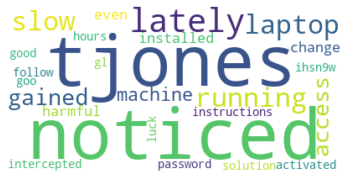

In [57]:
from wordcloud import WordCloud, STOPWORDS

# Read the text from the file data.txt.
text = open('./data/spam.txt').read()

# Get all stopwords and update with few others.
sw = set(STOPWORDS) 
sw.update(["dear", "virus", "mr"])

# Create and configure the word cloud object.
wc = WordCloud(background_color="white", stopwords=sw, max_words=2000)

# Generate the word cloud image from the text.
wordcloud = wc.generate(text.lower())

# Display the generated image.
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Stemming

`Stemming` is the process of cutting off the end (suffix) or the beginning (prefix) of an inflected word, ending up with its stem (root word). 

In [58]:
# Import the Porter stemmer.
from nltk.stem import PorterStemmer

# Create the stemmer.
stemmer = PorterStemmer()

# Stem the words 'playing', 'plays', 'played'.
stemmer.stem('playing')

'play'

In [59]:
stemmer.stem('plays')

'play'

In [60]:
stemmer.stem('played')

'play'

Notice that the output of stemming doesn't need to be a valid word.

In [61]:
# Stem the word 'bravery'
stemmer.stem('bravery')

'braveri'

We can even create our stemmer using regular expressions.

In [62]:
from nltk.stem import RegexpStemmer

# Create the stemmer matching words ending with 'ed'.
stemmer = RegexpStemmer('ed')

# Stem the verbs 'playing', 'plays', 'played'.
stemmer.stem('playing')

'playing'

In [63]:
stemmer.stem('plays')

'plays'

In [64]:
stemmer.stem('played')

'play'

## Lemmatization

`Lemmatization` is another sophisticated approach for reducing the inflectional forms of a word to a base root. The method performs morphological analysis of the word and obtains its proper lemma (the base form under which it appears in a dictionary). 

In [65]:
# Import the WordNet Lemmatizer.
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Create the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Lemmatize the verb 'played'.
lemmatizer.lemmatize('played', pos='v')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tsouraki\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tsouraki\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


'play'

In [66]:
# Lemmatize the verb 'led'.
lemmatizer.lemmatize('led', pos='v')

'lead'

In [67]:
# Lemmatize the adjective 'better'.
lemmatizer.lemmatize('better', pos='a')

'good'

## Classification

The [SpamAssassin public mail corpus](https://spamassassin.apache.org/old/publiccorpus/) public mail corpus  is a selection of email messages suitable for developing spam filtering systems. It offers two variants for the messages, either in plain text or HTML. Notice that for this exercise, we use the first type only. The term coined to describe the opposite of spam emails is ham, and the two words refer to meat products (spam refers to canned ham). In this exercise, we use a subset of the corpus. 

The primary task in the code below is to read the messages for the two categories and split them into two groups, namely one for training and one for testing. As a rule of thumb, we can choose an 75:25 split between the two sets, attributing the more significant proportion to the training data. 

In [68]:
import email
import glob
import numpy as np
from operator import is_not
from functools import partial
from sklearn.model_selection import train_test_split

# Load the path for each email file for both categories.
ham_files = train_test_split(glob.glob('./data/20030228_hard_ham/hard_ham/*'), random_state=123)
spam_files = train_test_split(glob.glob('./data/20050311_spam_2/spam_2/*'), random_state=123)

# Method for getting the content of an email.
def get_content(filepath):
    file = open(filepath, encoding='latin1')
    message = email.message_from_file(file)
    
    for msg_part in message.walk():
        # Keep only messages with text/plain content.
        if msg_part.get_content_type() == 'text/plain':
            return msg_part.get_payload()

# Get the training and testing data.
ham_train_data = [get_content(i) for i in ham_files[0]]
ham_test_data = [get_content(i) for i in ham_files[1]]
spam_train_data = [get_content(i) for i in spam_files[0]]
spam_test_data = [get_content(i) for i in spam_files[1]]

# Keep emails with non-empty content.
ham_train_data = list(filter(None, ham_train_data))
ham_test_data = list(filter(None, ham_test_data))
spam_train_data = list(filter(None, spam_train_data))
spam_test_data = list(filter(None, spam_test_data))

# Merge the train/test files for both categories.
train_data = np.concatenate((ham_train_data, spam_train_data))
test_data = np.concatenate((ham_test_data, spam_test_data))

# Assign a class for each email (ham = 0, spam = 1).
ham_train_class = [0]*len(ham_train_data)
ham_test_class = [0]*len(ham_test_data)
spam_train_class = [1]*len(spam_train_data)
spam_test_class = [1]*len(spam_test_data)

# Merge the train/test classes for both categories.
train_class = np.concatenate((ham_train_class, spam_train_class))
test_class = np.concatenate((ham_test_class, spam_test_class))

The next step is to preprocess the data using the techniques we learned. In the code that follows, we remove all stop words. 

In [69]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Tokenize the train/test data.
train_data = [word_tokenize(i) for i in train_data]
test_data = [word_tokenize(i) for i in test_data]


# Method for removing the stop words.
def remove_stop_words(input):
    result = [i for i in input if i not in ENGLISH_STOP_WORDS]
    return result

# Remove the stop words.
train_data = [remove_stop_words(i) for i in train_data]
test_data = [remove_stop_words(i) for i in test_data]

Now we lemmatize the words.

In [70]:
# Create the lemmatizer.
lemmatizer = WordNetLemmatizer()

# Method for lemmatizing the text.
def lemmatize_text(input):
    return [lemmatizer.lemmatize(i) for i in input]

# Lemmatize the text.
train_data = [lemmatize_text(i) for i in train_data]
test_data = [lemmatize_text(i) for i in test_data]

# Reconstruct the data.
train_data = [" ".join(i) for i in train_data]
test_data = [" ".join(i) for i in test_data]

We continue with the extraction of the features of each sentence in the two sets. This step uses tf-idf vectorization after training the vectorizer on the training data. 

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer.
vectorizer = TfidfVectorizer()

# Fit with the train data.
vectorizer.fit(train_data)

# Transform the test/train data into features.
train_data_features = vectorizer.transform(train_data)
test_data_features = vectorizer.transform(test_data)

Each of the *670* emails in the training set is represented with a feature vector of size *28337*. 

In [72]:
print(train_data_features.shape)

(670, 28337)


## Support Vector Machines

One of the most well-known supervised learning algorithms is `Support Vector Machines` (SVM).

We evaluate its performance in both the test and training sets. We are primarily interested in the first result, as it quantifies the accuracy of our model on unseen data; essentially, how well it generalizes. On the other hand, the performance on the training set indicates how well our model learned from the training data. As you can observe, the accuracy, in the latter case, is not *100%* as one might expect. In practical problems, it is almost always much less than *99%*. 

In [73]:
from sklearn import svm

# Create the classifier.
svm_classifier = svm.SVC(kernel="rbf", C=1.0, gamma=1.0, probability=True)

# Fit the classifier with the train data.
svm_classifier.fit(train_data_features.toarray(), train_class)

# Get the classification score of the test data.
svm_classifier.score(test_data_features.toarray(), test_class)

0.8755760368663594

In [74]:
# Get the classification score of the train data.
svm_classifier.score(train_data_features.toarray(), train_class)

0.9970149253731343

## Naïve Bayes

`Naïve Bayes` is a classification algorithm based on the `Bayes Theorem`. 

The outcome suggests that the performance of this classifier is inferior. Also, notice the performance on the actual training set, which is low and very close to the performance on the test set. This is another indication that the created model is not working very well.

In [75]:
from sklearn import naive_bayes

# Create the classifier.
nb_classifier = naive_bayes.MultinomialNB(alpha=1.0)

# Fit the classifier with the train data.
nb_classifier.fit(train_data_features.toarray(), train_class)

# Get the classification score of the test data.
nb_classifier.score(test_data_features.toarray(), test_class)

0.8571428571428571

In [76]:
# Get the classification score of the train data.
nb_classifier.score(train_data_features.toarray(), train_class)

0.8641791044776119

## Accuracy

In practical problems, we test different classification algorithms and see which one works best. Therefore there is always a need to compare different models in terms of theirperformance.

`Accuracy` is the percentage of correctly classified examples by an algorithm divided by the total number of examples. The code below calculates accuracy on the same data, and of course, its value is the same as the previous one.

In [77]:
from sklearn import metrics
 
# Get the predicted classes.
test_class_pred = nb_classifier.predict(test_data_features.toarray())

# Calculate the accuracy on the test set.
metrics.accuracy_score(test_class, test_class_pred)


0.8571428571428571

## Precision and Recall

`Precision` tells us the proportion of positive identifications that were, in reality, correct, and `Recall` tells us the proportion of the actual positives that were identified correctly.

In [78]:
# Calculate the precision on the test set.
metrics.precision_score(test_class, test_class_pred)

0.8564814814814815

In [79]:
# Calculate the recall on the test set.
metrics.recall_score(test_class, test_class_pred)

1.0

## F-score

`F-score`, is the harmonic mean of precision and recall. When precision and recall reach their perfect score (equal to *1*), F-score becomes *1*.

In [80]:
# Calculate the F-score on the test set.
metrics.f1_score(test_class, test_class_pred)

0.9226932668329177

## ROC and AUC

When the classifier returns some kind of confidence score for each prediction, we can use another technique for evaluating performance called `receiver operator characteristic` (ROC) curve. The greyed area in these plots, called the `area under the ROC curve` (AUC), is related to the quality of our model; the higher its surface, the better it is. 

First, we calculate the ROC curves for both classifiers, as shown below. AUC is *0.98* for SVM and *0.87* for Naïve Bayes, so the SVM classifier is a better choice for our spam detection problem.

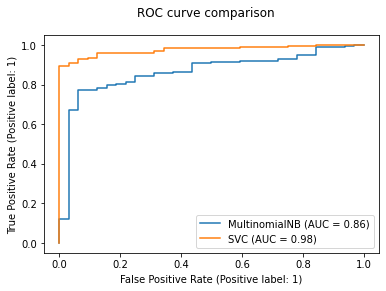

In [81]:
# Create and plot the ROC curves.
nb_disp = metrics.plot_roc_curve(nb_classifier, test_data_features.toarray(), test_class)
svm_disp = metrics.plot_roc_curve(svm_classifier, test_data_features.toarray(), test_class, ax=nb_disp.ax_)
svm_disp.figure_.suptitle("ROC curve comparison")
plt.show()

Finally, we calculate the ROC along with the precision recall curve for the Naïve Bayes model.

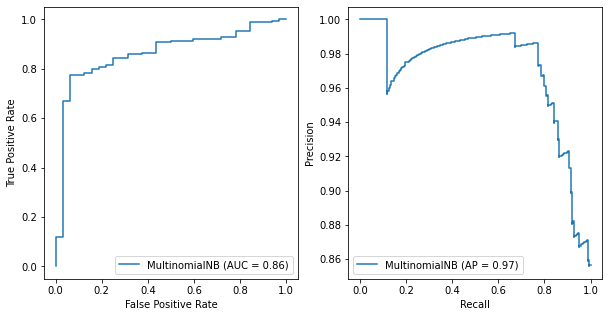

In [82]:
# Obtain the scores for each prediction.
probs = nb_classifier.predict_proba(test_data_features.toarray())
test_score = probs[:, 1]

# Compute the Receiver Operating Characteristic.
fpr, tpr, thresholds = metrics.roc_curve(test_class, test_score)

# Compute Area Under the Curve.
roc_auc = metrics.auc(fpr, tpr)

# Create the ROC curve.
rc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='MultinomialNB')

# Create the precision recall curves.
precision, recall, thresholds = metrics.precision_recall_curve(test_class, test_score)
ap = metrics.average_precision_score(test_class, test_score)
pr_display = metrics.PrecisionRecallDisplay(precision=precision, recall=recall, average_precision=ap, estimator_name='MultinomialNB')

# Plot the curves.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
rc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

### Machine Learning Techniques for Text 
&copy;2021&ndash;2022, Nikos Tsourakis, <nikos@tsourakis.net>, Packt Publications. All Rights Reserved.